<h1><center>The Sparks Foundation</center></h1>
<h3>TASK 2 - Exploratory Data Analysis - Retail</h3>

Perform 'Exploratory data Analysis' on dataset 'Sample Superstore'. Try to find out weak areas where you can work to make more profit.

Dataset: SampleSuperstore.csv(https://bit.ly/3i4rbWl)


<h3><b>Author - Chandan Soren </b></h3>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


####Data Exploration

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [28]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [29]:
df.shape

(9994, 13)

In [30]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [31]:
# Check the NULL values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Therefore, no null values found.

In [32]:
# Checking the unique values in the dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Company delivers product across 49 states from above data.

#### Exploratory Data Analysis

**Data visualization**

**Analysis using pairplot of each column**

1. Based on Category

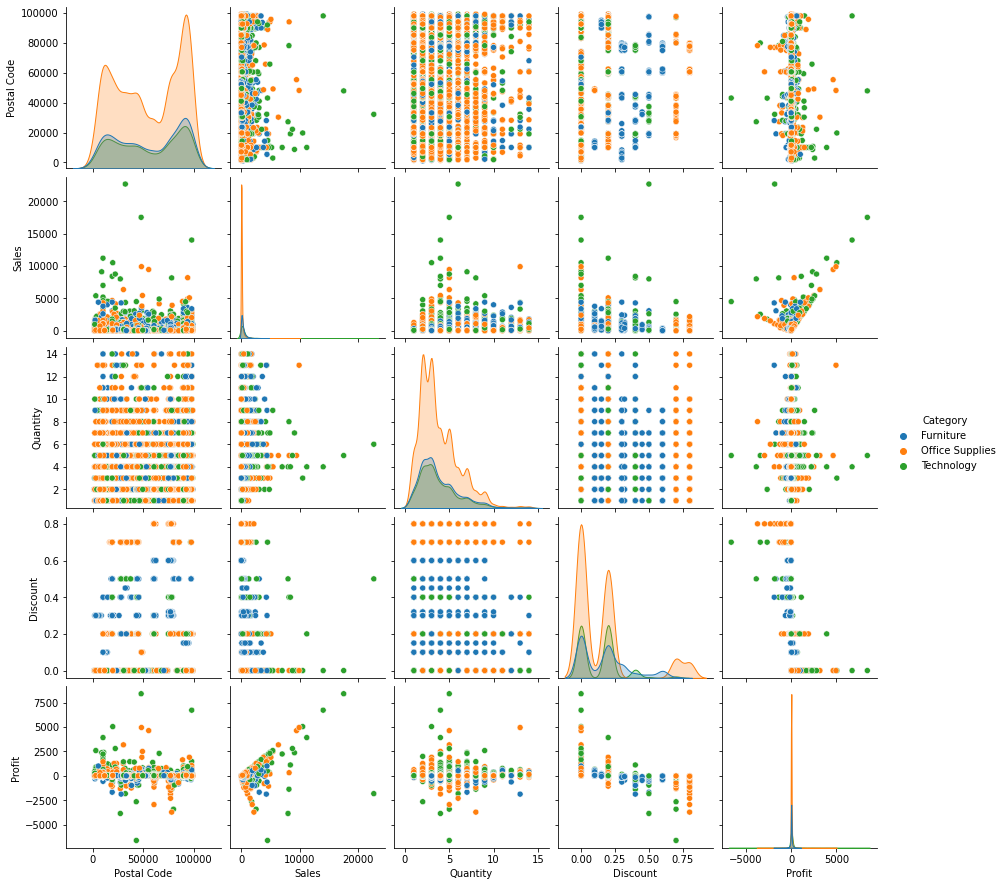

In [33]:
sns.pairplot(df, hue= "Category")

2. Based on Region

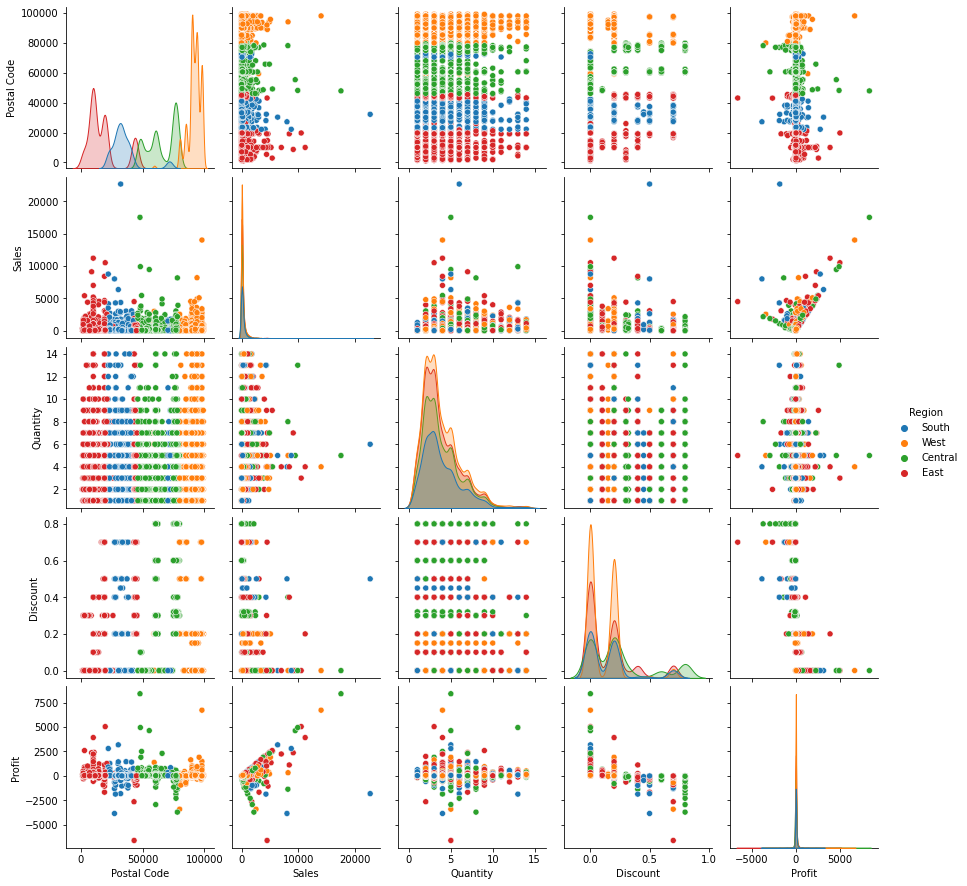

In [34]:
sns.pairplot(df, hue= "Region")

In [35]:
# Check correlation
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


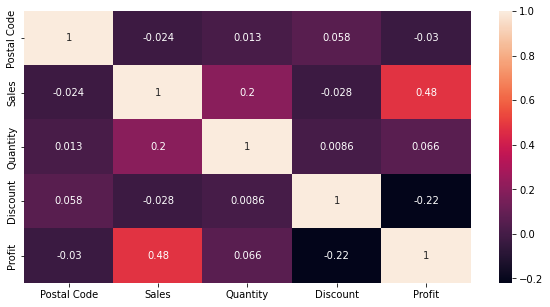

In [36]:
# Check the correlation by heatmap
fig, axes = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(df.corr(), annot= True)
plt.show()



*   **Brightest** color shows the strong correlation.
*   **Dark** color shows no correlation.



**Above Heatmap shows**



*   Sales and Profit are **moderately Correlated**.
*   Discount and Profit are **negatively correlated**.
*   Quantity and profit are less **moderately correlated**.

**Profit is correlated with Sales**


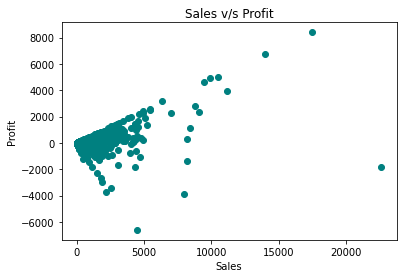

In [37]:
# Scatter plot
plt.scatter(df['Sales'], df['Profit'], c = 'Teal')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

At lower sales, a company either get profit or loss. But, when the sales increase, a company mostly get profit.

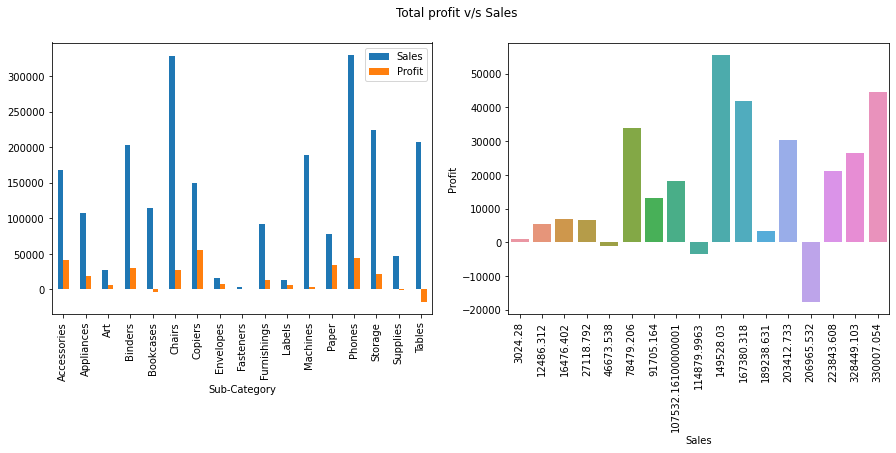

In [38]:
fig, axes = plt.subplots(1, 2, figsize= (15,5))
fig.suptitle("Total profit v/s Sales")
sns.barplot(data = df.groupby('Sub-Category')['Sales', 'Profit'].agg(sum), x = 'Sales', y = 'Profit', ax = axes[1], dodge=False)
df.groupby('Sub-Category')['Sales', 'Profit'].agg(sum).plot(kind = 'bar', ax=axes[0])
plt.xticks(rotation = 90)
plt.show()

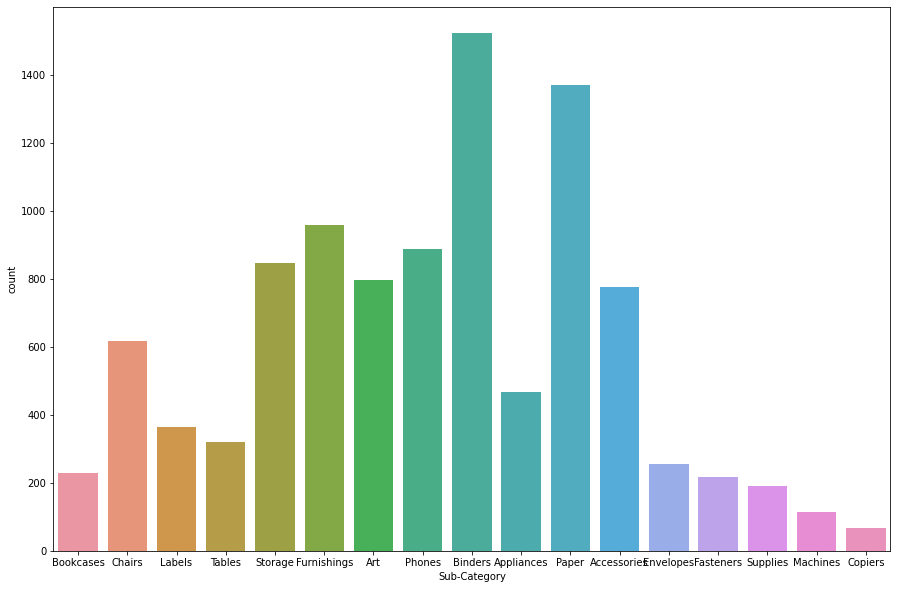

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(df['Sub-Category'])
plt.show()

Above plot shows Binders and Paper are more orderd by customers and Machines and Copiers are less ordered.

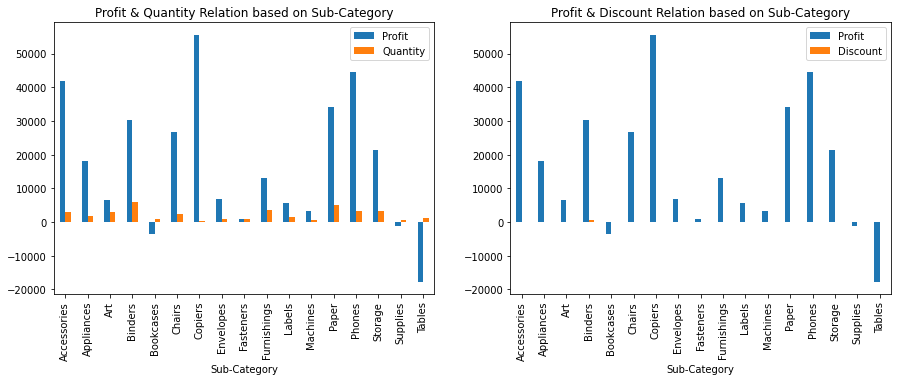

In [40]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))
df.groupby('Sub-Category')[ 'Profit', 'Quantity'].agg(sum).plot(kind= 'bar', ax=axes[0]).set_title('Profit & Quantity Relation based on Sub-Category')
df.groupby ('Sub-Category')[ 'Profit', 'Discount'].agg(sum).plot(kind= 'bar', ax=axes[1]).set_title('Profit & Discount Relation based on Sub-Category')
plt.xticks(rotation = 90)
plt.show()

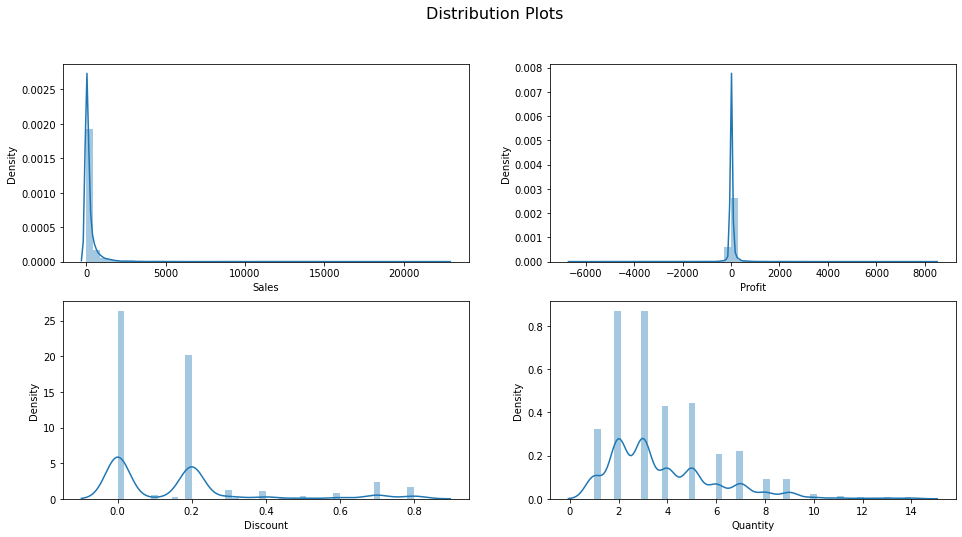

In [41]:
fig, axes = plt.subplots(2,2, figsize = (16, 8))
fig.suptitle("Distribution Plots", fontsize = 16)
sns.distplot(df['Sales'], ax=axes[0,0])
sns.distplot(df['Profit'], ax=axes[0,1])
sns.distplot(df['Discount'], ax=axes[1,0])
sns.distplot(df['Quantity'], ax=axes[1,1])
plt.show()

* Distribution plot of Sales rightly skewed (positively).
* Distribution plot of Profit is Normaly Distributed.

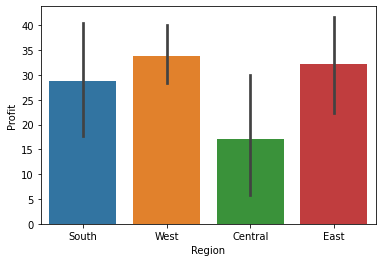

In [42]:
sns.barplot(x='Region',y='Profit',data=df)
plt.show()

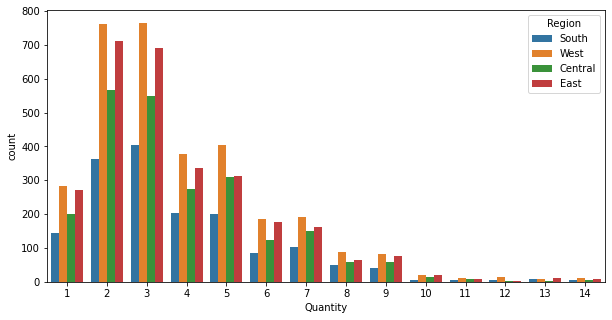

In [43]:
fig, axes = plt.subplots(1,1, figsize = (10, 5))
sns.countplot(df['Quantity'], hue = df['Region'])
plt.show()

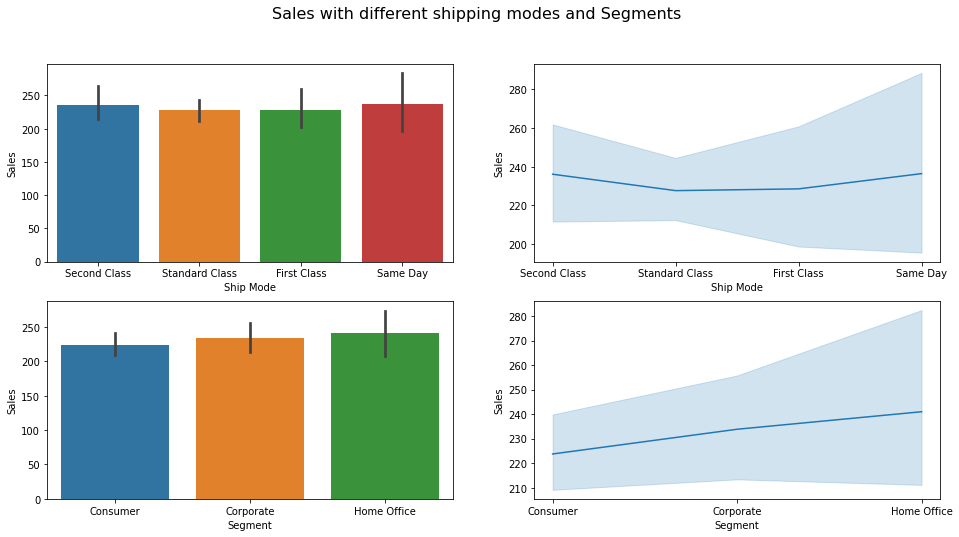

In [44]:
fig, axes = plt.subplots(2,2, figsize = (16, 8))
fig.suptitle("Sales with different shipping modes and Segments ", fontsize = 16)
sns.barplot(df['Ship Mode'], df ['Sales'], ax=axes[0,0],dodge=False)
sns.lineplot(df['Ship Mode'], df ['Sales'], ax=axes[0,1])
sns.barplot(df['Segment'], df ['Sales'], ax=axes[1,0])
sns.lineplot(df['Segment'], df ['Sales'], ax=axes[1,1])
plt.show()

## Some Important Findings

The features Profit and Discounts are highly related.
Over less quantity of products also the sales is high.
The maximum quantity of product in demand was in range 2-4.
The mode of shipping doesn't affect much to the sales.
The Home Office provides highest sales followed by Corporate by a slight variation.